# Temperature Prediction

**Dataset**: https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data

**Training Data**: Daily mean temperature of Delhi from 01.01.2013 till 01.01.2017. 

**Test Data**: Daily mean temperature of Delhi from 01.01.2017 till 24.04.2017. 


# Importing the required Libraries

In [1]:
import pandas as pd
import csv
import math
import matplotlib.pyplot as plt
import numpy as np

#Traditional Algorithm: Trailing Moving Average

## Preparing the Data

In [ ]:
dataset = pd.read_csv('/content/train.csv')

date = dataset['date']
train = dataset['meantemp']
window_size = 10                  # Window size is the hyperparameter. 
                             # Try and test with different values and find the lowest error(MSE).
predictions = []
error = 0

# For the training data we can't predict the temperature for the starting days because for predicting
# the current day we need to have the temperature values of the previous 3 days(if window size is 3).
# So intialized the starting days prediction with 0's until the day mean can be calculated. 

for i in range(0,window_size): 
  predictions.append(0)
print(predictions)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Calculating Trailing Moving Average

In [ ]:
import statistics

# The function takes previous 3 days(if window size = 3) as input and predict the temperature of the 
# current day by calculating the mean of the temperature of the previous days.

def MovingAverage(data): 
  
  # Here error and predictions are declared global because these variables are used outside of the function.
  global error
  global predictions
  mean = statistics.mean(data[:-1])
  predictions.append(mean)            # Storing the prediction values for each day
  temp = float(data[-1:] - mean)
  error = error + pow(temp,2)         # Calculating the error (predicted - original)^2

In [ ]:
# Iterating through the Dataset
# Starting the loop with window length. so that the mean can be calculated.
for i in range(window_size, len(train)):
  MovingAverage(train[i-window_size:i+1])  # Passing the temperature values of the previous 3 days and the current day
                                      # so that the mean and error can be calculated.  

# Calculating the error MSE = (predicted - original)^2/Total number of instances
# Subract the total instances with window because the first n(window size) predictions are initialized with 0's
# so these predictions shouldn't be included in the error calculation.
mse = error/(len(train)-window_size)   

print("MSE is:", mse)

MSE is: 4.792629968933781


## Visualization the results

In [ ]:
train = pd.DataFrame(train)
train['predictions'] = predictions
train['date'] = date
train.rename(columns = {'meantemp':'Actual Temperature'}, inplace = True) 
print(train)

      Actual Temperature  predictions        date
0              10.000000     0.000000  2013-01-01
1               7.400000     0.000000  2013-01-02
2               7.166667     0.000000  2013-01-03
3               8.666667     0.000000  2013-01-04
4               6.000000     0.000000  2013-01-05
...                  ...          ...         ...
1457           17.217391    16.993723  2016-12-28
1458           15.238095    17.107129  2016-12-29
1459           14.095238    16.845224  2016-12-30
1460           15.052632    16.274748  2016-12-31
1461           10.000000    15.975011  2017-01-01

[1462 rows x 3 columns]


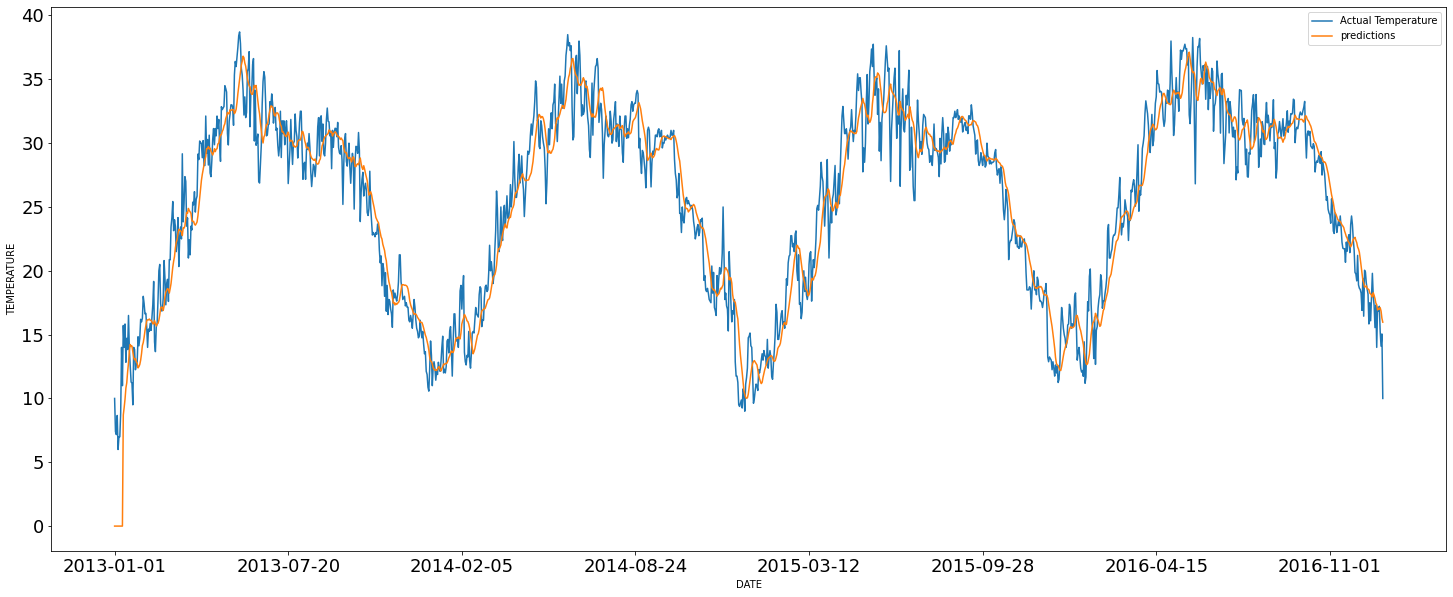

In [ ]:
train.plot(x="date", y=["Actual Temperature", "predictions"], figsize = (25,10), fontsize = 18, xlabel= 'DATE', ylabel = 'TEMPERATURE')
plt.show()


## Doing the same process on the test data



*   To compare the results with the AI model the code is reused on the Test data.

* A small change is necessary here. Instead of initializing the first n(window_size) predictions with zeros, initialize the test set with last n(window size) temperature values from the training set. Because test set is continuation of the training set. Now the predictions can be performed on the starting days of the test set as well.


In [ ]:
test_dataset = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')

train = train[:-1]          # last row has to be eliminated because it is the first row of the test data
date = list(test_dataset['date'])   
test = test_dataset['meantemp']
window_size = 3       
predictions = []
error = 0

train_date = list(train[-window_size:]['date'])             #To get the last n(window_size) instances from the training data(temparature,date)
                                                            # in order to compute the mean for the initial days of the test set.
train= train[-window_size:]['meantemp']
train = list(train)
test = list(test)

temp = len(train)-1
for i in range(0,len(train)):     # Inserting the last n instances from the training set to the test set. But no predictions
                                  # were done to these instances   
  test.insert(0, train[temp])
  temp -= 1

for i in range(0,window_size):    # Initialized the Predictions for instances of the training set as 0's. But these predictions are not                                  
  predictions.append(0)           # included in the error computation.

import statistics


def MovingAverage(data): 
  
 
  global error
  global predictions
  mean = statistics.mean(data[:-1])
  predictions.append(mean)           
  temp = float(data[-1:][0] - mean)
  error = error + pow(temp,2) 


for i in range(window_size, len(test)):
  MovingAverage(test[i-window_size:i+1])  

mse = error/(len(test)-window_size)   
#print(len(test),window_size)
print("MSE is:",mse)


test = pd.DataFrame(test,columns=['Actual Temperature'])
test['predictions'] = predictions

temp = window_size-1              
for i in range(0, window_size):     # Inserting dates of the training instances to test Data frame
  date.insert(0,train_date[temp])
  temp -= 1

test['date'] = date
print(test)


MSE is: 3.875238738387225
     Actual Temperature  predictions        date
0             15.238095     0.000000  2016-12-29
1             14.095238     0.000000  2016-12-30
2             15.052632     0.000000  2016-12-31
3             15.913043    14.795322  2017-01-01
4             18.500000    15.020304  2017-01-02
..                  ...          ...         ...
112           34.500000    33.351852  2017-04-20
113           34.250000    34.000000  2017-04-21
114           32.900000    34.083333  2017-04-22
115           32.875000    33.883333  2017-04-23
116           32.000000    33.341667  2017-04-24

[117 rows x 3 columns]


## Visualizing the Prediction Results

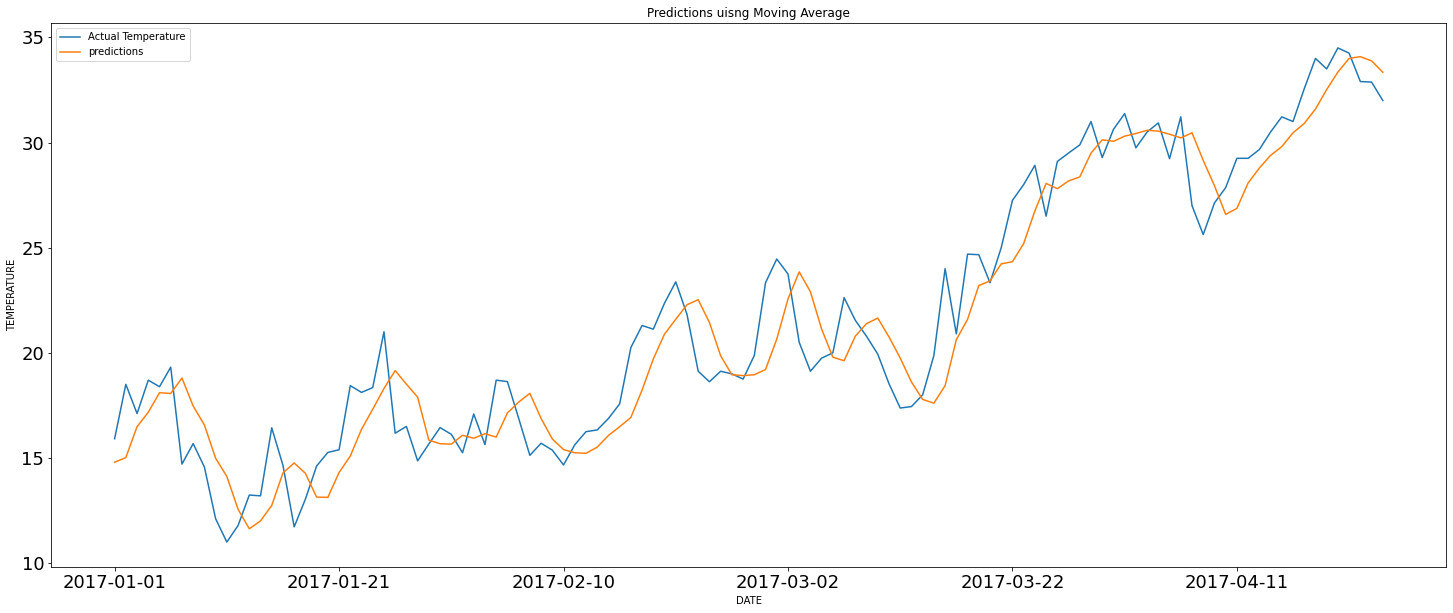

In [ ]:
test = test[window_size:]   # Removing the first n(window_size) instances because they are 0's
test.plot(x="date", y=["Actual Temperature", "predictions"], figsize = (25,10), fontsize = 18, xlabel= 'DATE', ylabel = 'TEMPERATURE',title = 'Predictions uisng Moving Average')
plt.show()

# Using AI model

In [19]:
import tensorflow as tf
import numpy as np

train = pd.read_csv('/content/train.csv')
training_data = train['meantemp']

training_data = np.array(training_data)
training_data = tf.expand_dims(training_data,1)  #MinMaxScaler expects 2 diminsional array but our training data is 1D.
print(training_data.shape)                       # So the dimension should be expanded.


(1462, 1)


## Normalizing the inputs

In [20]:
from sklearn.preprocessing import MinMaxScaler  #Scaling is performed in order to speed up the computation and faster convergence.

sc = MinMaxScaler(feature_range = (0,1))
training_data_scaled = sc.fit_transform(training_data)

## Pre-processing the data

In [21]:
x_train = []
y_train = []

window = 60     # Hyperparameter, try and test with different values to get better results.

for i in range(window, len(training_data)):              # Preparing the dataset:Now each row contains 30(window) features. For example 
  x_train.append(training_data_scaled[i-window:i, 0])    # First row contains temperature values from 01.01.2013 till 30.01.2013. These are the features
  y_train.append(training_data_scaled[i,0])              # and temperature of 31.01.2013 is the class label. Next row 02.01.2013 till 31.01.2013 are 
                                                         # features and temperature of 01.02.2013 is the class label and so on..
x_train, y_train = np.array(x_train), np.array(y_train)


In [22]:
x_train.shape

(1402, 60)

In [23]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))  # The model accepts inputs with 3 dimensions

In [24]:
x_train.shape[1]

60

## Model Architecture

In [25]:


regressor = tf.keras.models.Sequential()

#1st LSTM Layer
regressor.add(tf.keras.layers.LSTM(units = 60, return_sequences = True, input_shape = (x_train.shape[1],1)))   #units are the number of neuros in each LSTM layer
regressor.add(tf.keras.layers.Dropout(0.2))                                                                   # Input shape is 3D but here only 2D is specified. The
                                                                                                              # model by default adds the shape of the 1st dimension
#2nd LSTM Layer                                                                                              `# which is batch size. 

regressor.add(tf.keras.layers.LSTM(units = 60, return_sequences = True))                                       # As the LSTM layers are stacked on top of each other
regressor.add(tf.keras.layers.Dropout(0.2))                                                                   # we need to set the return sequences to True.
                                                                                                              # So the output of each LSTM unit is passed to the
#3rd LSTM Layer                                                                                               # unit on the top of it.

regressor.add(tf.keras.layers.LSTM(units = 60, return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.2))

#4th LSTM Layer

regressor.add(tf.keras.layers.LSTM(units = 60))
regressor.add(tf.keras.layers.Dropout(0.2))

#Output layer

regressor.add(tf.keras.layers.Dense(units= 1))

#Compiling the LSTM
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


#Fitting the LSTM to the training data

regressor.fit(x_train, y_train,
              epochs = 300 ,
              batch_size = 16)

Epoch 1/300
88/88 [==============================] - 1s 13ms/step - loss: 0.0321
Epoch 2/300
88/88 [==============================] - 1s 14ms/step - loss: 0.0129
Epoch 3/300
88/88 [==============================] - 1s 13ms/step - loss: 0.0103
Epoch 4/300
88/88 [==============================] - 1s 12ms/step - loss: 0.0094
Epoch 5/300
88/88 [==============================] - 1s 13ms/step - loss: 0.0096
Epoch 6/300
88/88 [==============================] - 1s 13ms/step - loss: 0.0097
Epoch 7/300
88/88 [==============================] - 1s 13ms/step - loss: 0.0085
Epoch 8/300
88/88 [==============================] - 1s 12ms/step - loss: 0.0086
Epoch 9/300
88/88 [==============================] - 1s 13ms/step - loss: 0.0084
Epoch 10/300
88/88 [==============================] - 1s 13ms/step - loss: 0.0085
Epoch 11/300
88/88 [==============================] - 1s 12ms/step - loss: 0.0077
Epoch 12/300
88/88 [==============================] - 1s 13ms/step - loss: 0.0073
Epoch 13/300
88/88 [=====

## Pre-processing the Test dataset

In [26]:
dataset_test = pd.read_csv('/content/test.csv')
train = train[:-1]

date = dataset_test['date']
test_data = dataset_test.iloc[:, 1:2].values

In [27]:
total_dataset = pd.concat((train['meantemp'], dataset_test['meantemp']), axis =0)

In [28]:
print(len(train))
print(len(dataset_test))
print(len(total_dataset))

1461
114
1575


In [29]:
inputs = total_dataset[len(total_dataset) - len(dataset_test)-window:].values #First training and the test dataset are combined and then test dataset
inputs = inputs.reshape(-1,1)                                                 # and window are subtracted. By doing this starting values of the test set 
inputs = sc.transform(inputs)                                                 # can be computed. For example, the test set starts from 
                                                  #01.01.2017 for predicting the temperature of this day we need to set the temperatures of the past 30 days
                                                  #as feautures. For that we need to get back to the training data to get the temperature values.
print(len(inputs))

174


## Prediction on the Test set

In [30]:
x_test = []
y_test = []
max = window + len(dataset_test)

for i in range(window, max):                        # Preparing the test data with window size features                                
  x_test.append(inputs[i-window:i, 0])
  y_test.append(inputs[i,0])

x_test = np.array(x_test)
y_test = np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))    # Reshaping to 3D 
print(x_test.shape)
predicted_temperature = regressor.predict(x_test)

predicted_temperature = sc.inverse_transform(predicted_temperature)

(114, 60, 1)


In [31]:
predicted_temperature = tf.squeeze(                 #Removing the extra dimension to store the results in a Data frame
    predicted_temperature, axis=1, name=None
)

In [32]:
predicted_temperature = pd.DataFrame(predicted_temperature)
temperature = dataset_test['meantemp']
temperature = pd.DataFrame(temperature)
temperature['Predicted Temperature'] = predicted_temperature
temperature['date'] = date
temperature.rename(columns = {'meantemp':'Actual Temperature'}, inplace = True) 


In [33]:
temperature

,Actual Temperature,Predicted Temperature,date
0,15.913043,15.443767,2017-01-01
1,18.500000,16.169260,2017-01-02
2,17.111111,18.085638,2017-01-03
3,18.700000,16.742731,2017-01-04
4,18.388889,18.163776,2017-01-05
...,...,...,...
109,34.500000,32.684372,2017-04-20
110,34.250000,33.419167,2017-04-21
111,32.900000,33.467434,2017-04-22
112,32.875000,32.503765,2017-04-23


## Visualizing the results

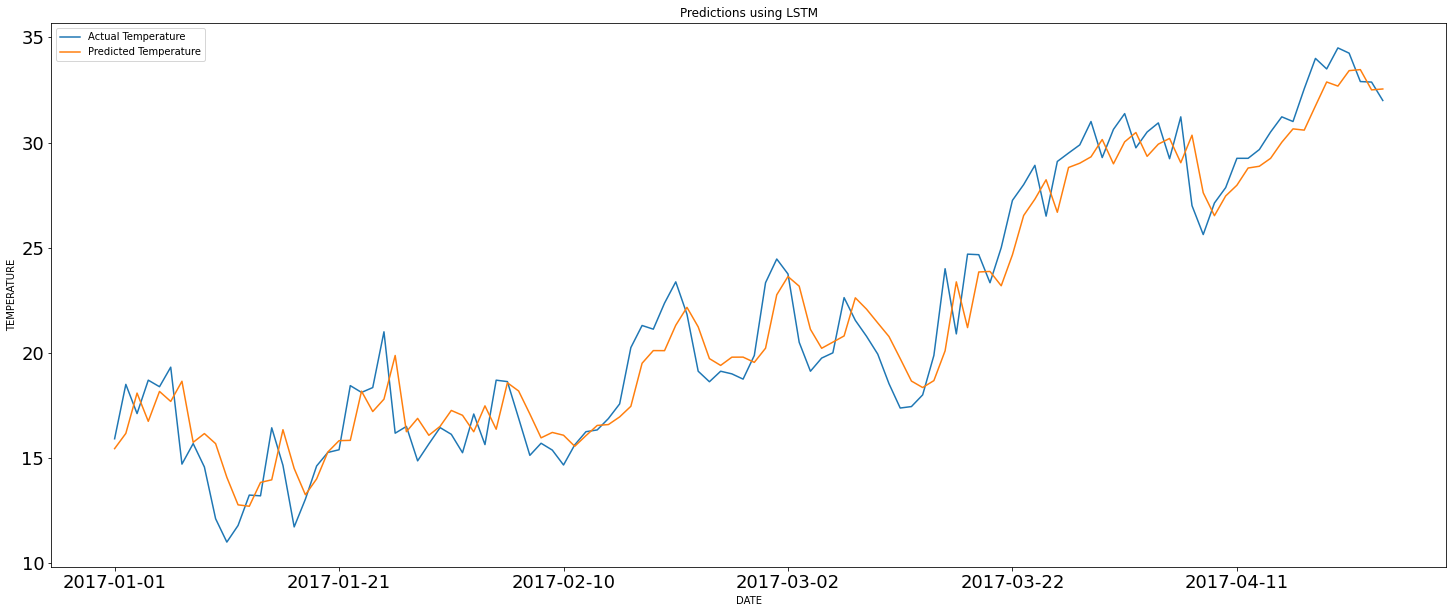

In [34]:
temperature.plot(x="date", y=["Actual Temperature", "Predicted Temperature"], figsize = (25,10), fontsize = 18, xlabel= 'DATE', ylabel = 'TEMPERATURE',title = 'Predictions using LSTM')
plt.show()

## Computing the MSE

In [35]:
mse = 0
for i in range(0, len(temperature)):
  temp = temperature.iloc[i,0] - temperature.iloc[i,1]
  error = math.pow(temp,2)
  mse = mse + error
mse = mse/(len(temperature))

In [36]:
print("MSE is:",mse)

MSE is: 2.7906947417268477
